In [1]:
import pandas as pd
import nltk
import seaborn as sns

In [3]:
df = pd.read_csv("SMSSpamCollection", sep = '\t', names = ['label', 'text'])

In [5]:
df

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [7]:
x = df['text']
y = df['label']

In [9]:
set(y)

{'ham', 'spam'}

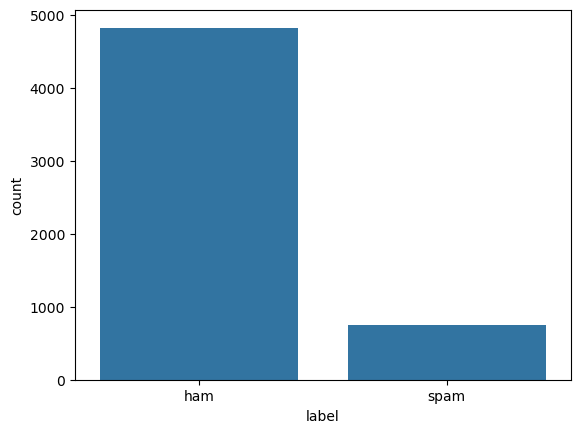

In [11]:
sns.countplot(x = y);

In [13]:
x[:5]

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
Name: text, dtype: object

# data preprocessing

In [16]:
# tokenize
# remove punctuations
# remove stopwords
# remove suffix and make the root word
# convert the data to nnumbers

In [18]:
sent = "Hi everyone! How are you? I like Python Programming"

In [20]:
from nltk.tokenize import word_tokenize

In [22]:
tokens1 = word_tokenize(sent)

In [24]:
tokens1

['Hi',
 'everyone',
 '!',
 'How',
 'are',
 'you',
 '?',
 'I',
 'like',
 'Python',
 'Programming']

In [26]:
# remove the punctuations and digits

In [28]:
filtered_tokens = []
for token in tokens1:
    if token.isalpha():
        filtered_tokens.append(token.lower())

In [30]:
filtered_tokens

['hi', 'everyone', 'how', 'are', 'you', 'i', 'like', 'python', 'programming']

In [32]:
# remove the stopwords

In [34]:
from nltk.corpus import stopwords

In [36]:
swords = stopwords.words("english")

In [38]:
swords

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [40]:
tokens3 = [x for x in filtered_tokens if x not in swords]
tokens3

['hi', 'everyone', 'like', 'python', 'programming']

In [42]:
# remove suffix -> stemming

In [44]:
from nltk.stem import PorterStemmer

In [46]:
ps = PorterStemmer()

In [50]:
ps.stem("walking")

'walk'

In [52]:
tokens4 = [ps.stem(x) for x in tokens3]

In [54]:
tokens4

['hi', 'everyon', 'like', 'python', 'program']

In [56]:
# create a clean text function

In [70]:
def clean_text(sent):
    tokens1 = word_tokenize(sent)
    filtered_tokens = [x.lower() for x in tokens1 if x.isalpha()]
    tokens3 = [x for x in filtered_tokens if x not in swords]
    tokens4 = [ps.stem(x) for x in tokens3]
    return tokens4

In [72]:
sent = "It was not possible for him. The time was running out."

In [74]:
clean_text(sent)

['possibl', 'time', 'run']

In [76]:
x

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: text, Length: 5572, dtype: object

In [82]:
x_new = x.apply(lambda x: clean_text(x))
x_new

0       [go, jurong, point, crazi, avail, bugi, n, gre...
1                            [ok, lar, joke, wif, u, oni]
2       [free, entri, wkli, comp, win, fa, cup, final,...
3           [u, dun, say, earli, hor, u, c, alreadi, say]
4            [nah, think, goe, usf, live, around, though]
                              ...                        
5567    [time, tri, contact, u, pound, prize, claim, e...
5568                       [ü, b, go, esplanad, fr, home]
5569                                [piti, mood, suggest]
5570    [guy, bitch, act, like, interest, buy, someth,...
5571                                   [rofl, true, name]
Name: text, Length: 5572, dtype: object

# tf-idf

In [85]:
text = ["the king's court, inside the Raigad Fort, has a replica of the original throne that faces the main doorway called the Nagarkhana Darwaja.", 
        "It faces the East Side.", 
        "It was here where Chhatrapati Shivaji Maharaj's Rajabhishek took place.", 
        "This enclosure had been acoustically designed to aid hearing from the doorway to the throne.", "A secondary entrance, called the Mena Darwaja on the south side, was supposedly the private entrance for the royal ladies of the fort that lead to the queen's quarters.",
        "The convoy of the king and the king himself used the Palkhi Darwaja.", 
        "on the north side. To the right of Palkhi Darwaja, is a row of three dark and deep chambers.", 
        "Historians believe that these were the granaries for the fort."]

In [87]:
text

["the king's court, inside the Raigad Fort, has a replica of the original throne that faces the main doorway called the Nagarkhana Darwaja.",
 'It faces the East Side.',
 "It was here where Chhatrapati Shivaji Maharaj's Rajabhishek took place.",
 'This enclosure had been acoustically designed to aid hearing from the doorway to the throne.',
 "A secondary entrance, called the Mena Darwaja on the south side, was supposedly the private entrance for the royal ladies of the fort that lead to the queen's quarters.",
 'The convoy of the king and the king himself used the Palkhi Darwaja.',
 'on the north side. To the right of Palkhi Darwaja, is a row of three dark and deep chambers.',
 'Historians believe that these were the granaries for the fort.']

In [89]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [91]:
tfidf = TfidfVectorizer()

In [93]:
sent_new = tfidf.fit_transform(text)

In [97]:
sent_new

<8x71 sparse matrix of type '<class 'numpy.float64'>'
	with 102 stored elements in Compressed Sparse Row format>

In [99]:
sent_new_df = pd.DataFrame(data = sent_new.toarray(),
                          columns= tfidf.get_feature_names_out())

In [101]:
sent_new_df

,acoustically,aid,and,been,believe,called,chambers,chhatrapati,convoy,court,...,these,this,three,throne,to,took,used,was,were,where
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.195679,0.000000,0.000000,0.00000,0.233485,...,0.000000,0.000000,0.000000,0.195679,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.326082,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.326082,0.00000,0.273282,0.000000,0.326082
3,0.274268,0.274268,0.000000,0.274268,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.274268,0.000000,0.229858,0.396697,0.000000,0.00000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.161651,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.139491,0.000000,0.00000,0.161651,0.000000,0.000000
5,0.000000,0.000000,0.250351,0.000000,0.000000,0.000000,0.000000,0.000000,0.29872,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.29872,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.224303,0.000000,0.000000,0.000000,0.267639,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.267639,0.000000,0.193555,0.000000,0.00000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.364047,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.364047,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.364047,0.000000


In [107]:
len(sent_new_df.columns)

71

In [105]:
sent_new_df['palkhi']

0    0.000000
1    0.000000
2    0.000000
3    0.000000
4    0.000000
5    0.250351
6    0.224303
7    0.000000
Name: palkhi, dtype: float64

In [109]:
### Apply on the dataset

In [111]:
x

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: text, Length: 5572, dtype: object

In [147]:
tfidf = TfidfVectorizer(analyzer= clean_text)

In [149]:
x_new = tfidf.fit_transform(x)

In [150]:
x_new.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [153]:
x_new.toarray().shape

(5572, 5925)

In [121]:
# cross val

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_new, y,
                                                   random_state= 0
                                                   )

In [123]:
x_train.shape, y_train.shape

((4179, 5925), (4179,))

In [125]:
# build the model

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state= 0)
rf.fit(x_train, y_train)

RandomForestClassifier(random_state=0)

In [127]:
# evaluate

y_pred = rf.predict(x_test)

In [129]:
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay

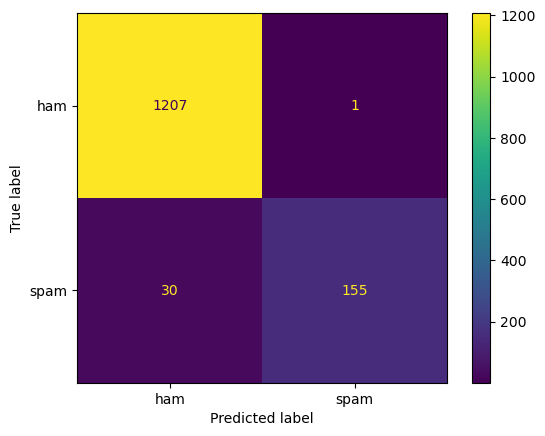

In [131]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred);

In [133]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1208
        spam       0.99      0.84      0.91       185

    accuracy                           0.98      1393
   macro avg       0.98      0.92      0.95      1393
weighted avg       0.98      0.98      0.98      1393



In [135]:
accuracy_score(y_test, y_pred)

0.9777458722182341

In [137]:
# predict on unseen data

# data => sample.csv

In [141]:
sample = pd.read_csv('sample.csv', sep = '\t', names = ['text'])
sample

,text
0,Ok lar i double check wif da hair dresser alre...
1,"As a valued customer, I am pleased to advise y..."
2,"Today is ""song dedicated day.."" Which song wil..."


In [155]:
new = tfidf.transform(sample['text'])

In [157]:
rf.predict(new)

array(['ham', 'spam', 'ham'], dtype=object)

In [159]:
sample['text'][0]

'Ok lar i double check wif da hair dresser already he said wun cut v short. He said will cut until i look nice.,,'

In [161]:
sample['text'][1]

'As a valued customer, I am pleased to advise you that following recent review of your Mob No. you are awarded with a £1500 Bonus Prize, call 09066364589'

In [165]:
sample['text'][2]

'Today is "song dedicated day.." Which song will u dedicate for me? Send this to all ur valuable frnds but first rply me...,,'